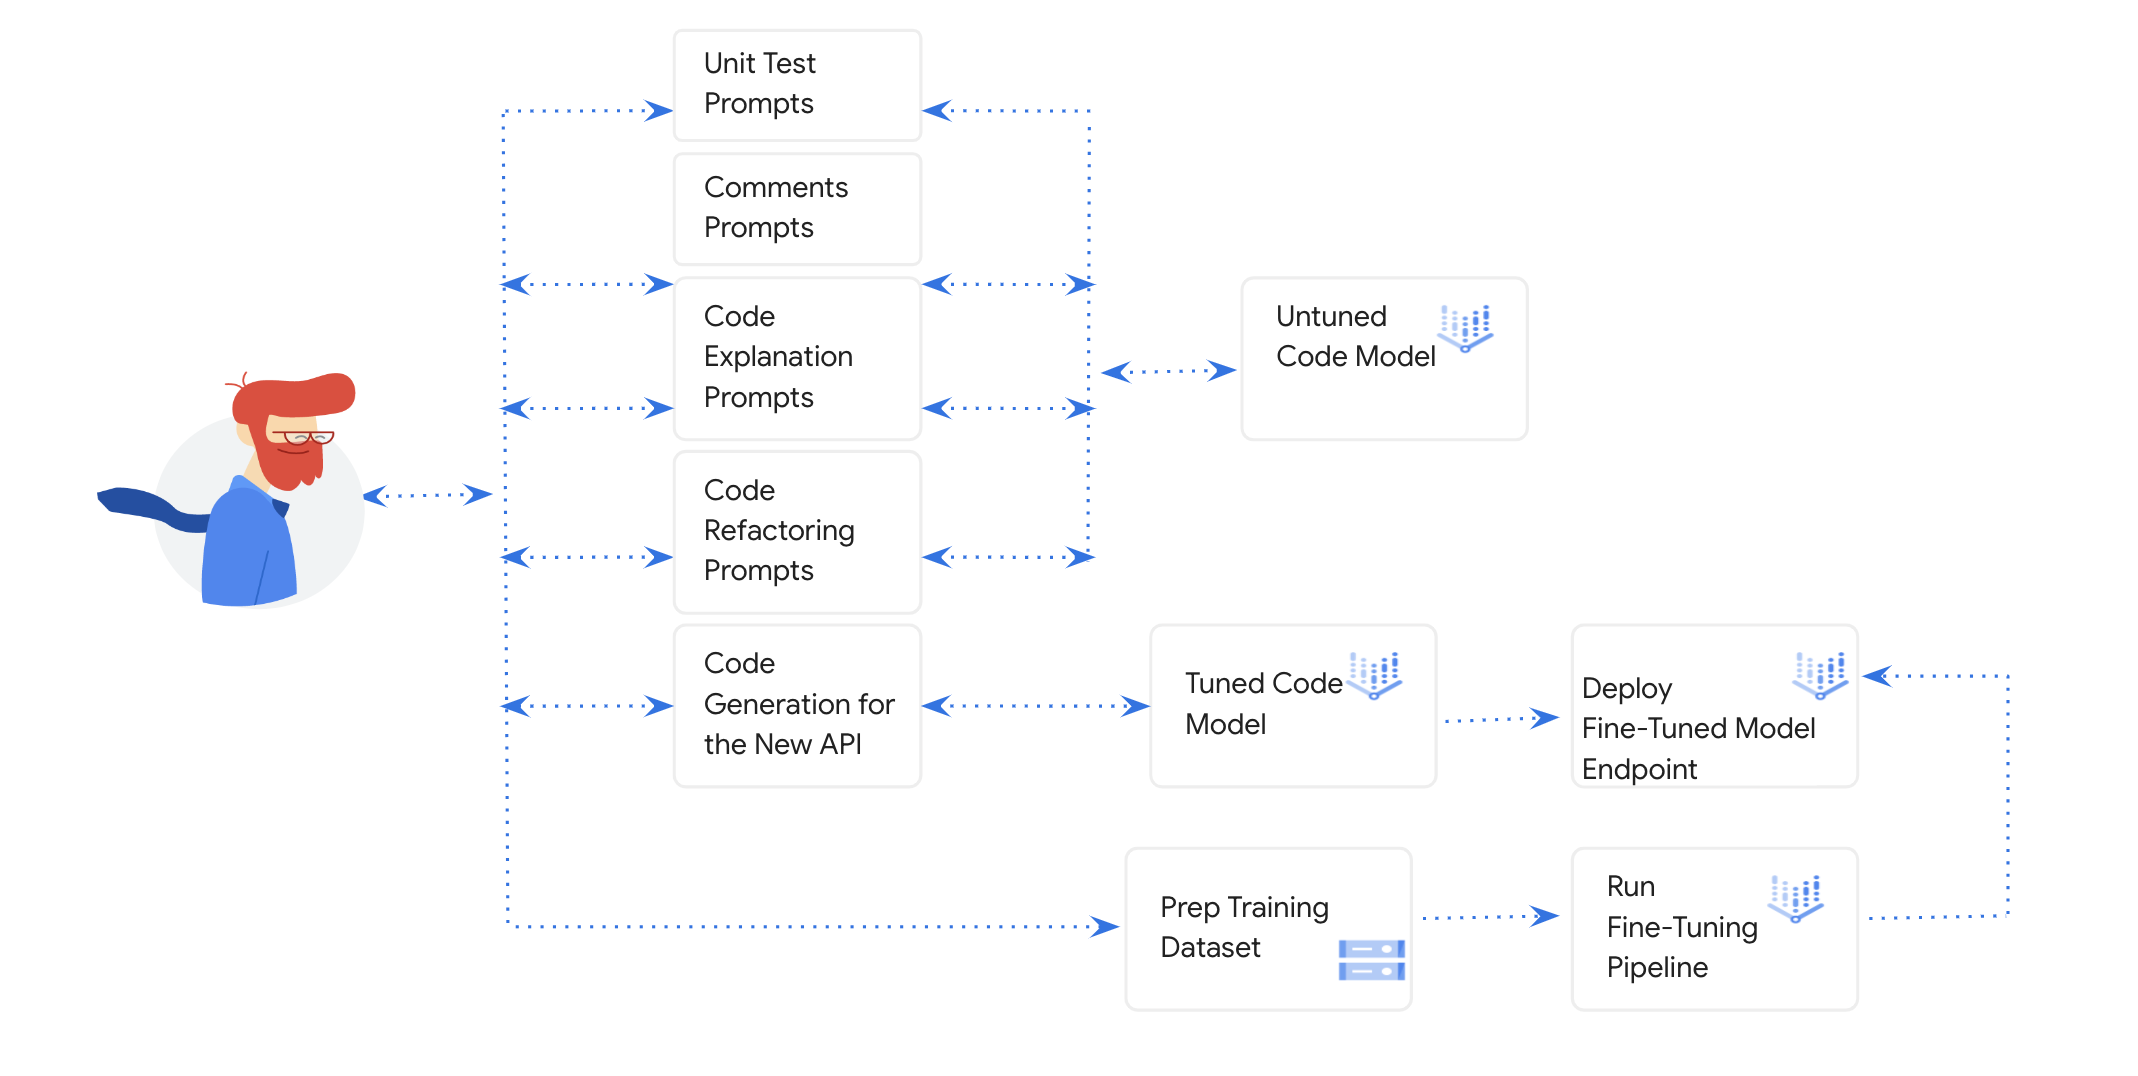


* Author: [leip@](https://moma.corp.google.com/person/leip)
* Date: 10/27/23
* Workflow Architecture: [Link](https://docs.google.com/presentation/d/1XwUHAQHtRAG6_lZqvGaW4H4gNpwEorXUdJVRabz0GLU/edit?resourcekey=0-1BAo1aT9KaNtSd1ZV6Qi6g#slide=id.g25cfeeba18d_0_0)

In [ ]:
# @title Prep Work
import sys
if 'google.colab' in sys.modules:
    ! pip install google-cloud-aiplatform
    ! pip install google-cloud-discoveryengine
    ! pip install jsonlines
    from google.colab import auth as google_auth
    google_auth.authenticate_user()

In [ ]:
import sys
import json
import os
import vertexai
from typing import Dict, List, Optional, Tuple
from google.cloud import discoveryengine
from google.protobuf.json_format import MessageToDict

In [ ]:
# @title Initialize Vertex AI
import vertexai
from vertexai.preview.language_models import CodeGenerationModel

VERTEX_API_PROJECT = 'cloud-llm-preview4'
VERTEX_API_LOCATION = 'us-central1'

vertexai.init(project=VERTEX_API_PROJECT, location=VERTEX_API_LOCATION)
code_generation_model = CodeGenerationModel.from_pretrained("code-bison@001")

def send_prompt(prefix, max_token=1024, model = code_generation_model):
    parameters = {
    "temperature": 0.2,
    "max_output_tokens": max_token
    }

    response = model.predict(
    prefix=prefix, **parameters
    )

    return response.text

In [ ]:
# @title Set Up Vertex AI Search API Parameters
project_id = "genai-hackathon-003"
location = "global"
search_engine_id = "ad-help_1688047621201"
serving_config_id = "default_config"

In [ ]:
# @title Generate Vertex AI Search API Code using Untuned Codey Model
prompt = """
Generate a function to send search queries to the Vertex AI Search API and retrieve the search results.
"""
print(send_prompt (prompt))

```python
def search_vertex_ai(query):

  # Create a client for the Vertex AI Search API.
  client = VertexAiSearchClient()

  # Create a search request.
  request = SearchRequest()
  request.query = query

  # Send the search request.
  response = client.search(request)

  # Get the search results.
  results = response.results

  # Return the search results.
  return results
```


In [ ]:
# @title Tune Model to Understand the Latest Vertex AI Search API
model = CodeGenerationModel.from_pretrained("code-bison@001")

training_dataset_url = "gs://codey-fine-tuning/training_dataset/codeydataset.jsonl"
model.tune_model(
    training_data=training_dataset_url,
    train_steps=200,
    tuning_job_location="europe-west4",
    tuned_model_location="us-central1",
    model_display_name="codey-custom-model-searchapi"
    )

In [ ]:
# @title Query Tuned Model to Generate Vertext AI Search Code
list_models = CodeGenerationModel.from_pretrained("code-bison@001").list_tuned_model_names()
TUNED_MODEL_NAME = list_models[0]
tuned_model = CodeGenerationModel.get_tuned_model(TUNED_MODEL_NAME)
vertexai_search_code = send_prompt(prefix=prompt,model= tuned_model)
vertexai_search_code = vertexai_search_code.removeprefix(' ```python').removesuffix('```')
print(vertexai_search_code)

```python
def search_sample(
    project_id: str,
    location: str,
    search_engine_id: str,
    serving_config_id: str,
    search_query: str,
) -> List[discoveryengine.SearchResponse.SearchResult]:
    client = discoveryengine.SearchServiceClient()
    serving_config = client.serving_config_path(
        project=project_id,
        location=location,
        data_store=search_engine_id,
        serving_config=serving_config_id,
    )

    request = discoveryengine.SearchRequest(
        serving_config=serving_config,
        query=search_query,
    )
    response = client.search(request)

    return response



In [ ]:
# @title Use the Generated Code to Query Vertex Search Engine
def search_sample(
    project_id: str,
    location: str,
    search_engine_id: str,
    serving_config_id: str,
    search_query: str,
) -> List[discoveryengine.SearchResponse.SearchResult]:
    client = discoveryengine.SearchServiceClient()
    serving_config = client.serving_config_path(
        project=project_id,
        location=location,
        data_store=search_engine_id,
        serving_config=serving_config_id,
    )

    request = discoveryengine.SearchRequest(
        serving_config=serving_config,
        query=search_query,
    )
    response = client.search(request)

    return response

In [ ]:
search_query = "how to improve campaign performance"
results = search_sample(project_id,location,search_engine_id,serving_config_id,search_query)
print(results)

SearchPager<results {
  id: "0"
  document {
    name: "projects/1062767160769/locations/global/collections/default_collection/dataStores/ad-help_1688047621201/branches/0/documents/0"
    id: "0"
    derived_struct_data {
      fields {
        key: "displayLink"
        value {
          string_value: "support.google.com"
        }
      }
      fields {
        key: "formattedUrl"
        value {
          string_value: "https://support.google.com/google-ads/answer/10724817?hl=en"
        }
      }
      fields {
        key: "htmlFormattedUrl"
        value {
          string_value: "https://support.google.com/google-ads/answer/10724817?hl=en"
        }
      }
      fields {
        key: "htmlTitle"
        value {
          string_value: "About <b>Performance</b> Max <b>campaigns</b> - Google Ads Help"
        }
      }
      fields {
        key: "link"
        value {
          string_value: "https://support.google.com/google-ads/answer/10724817?hl=en"
        }
      }
      fi

In [ ]:
# @title Modify Generated Code with Protobuf Parsing Code
proto_prompt = """
Create a function to send search requests to Vertex AI Search API, convert the protobuf search response to a dictionary, and return the dictionary result.
"""
vertexai_search_code = send_prompt(prefix=proto_prompt,model= tuned_model)
vertexai_search_code = vertexai_search_code.removeprefix(' ```python').removesuffix('```')
print(vertexai_search_code)

```python
def search_sample(
    project_id: str,
    location: str,
    search_engine_id: str,
    serving_config_id: str,
    search_query: str,
) -> List[discoveryengine.SearchResponse.SearchResult]:
    client = discoveryengine.SearchServiceClient()
    serving_config = client.serving_config_path(
        project=project_id,
        location=location,
        data_store=search_engine_id,
        serving_config=serving_config_id,
    )

    request = discoveryengine.SearchRequest(
        serving_config=serving_config,
        query=search_query,
    )
    response = client.search(request)
    results = [MessageToDict(result.document._pb) for result in response.results]

    return results



In [ ]:
# @title Use the Generated Code to Query Vertex Search Engine
def search_sample(
    project_id: str,
    location: str,
    search_engine_id: str,
    serving_config_id: str,
    search_query: str,
) -> List[discoveryengine.SearchResponse.SearchResult]:
    client = discoveryengine.SearchServiceClient()
    serving_config = client.serving_config_path(
        project=project_id,
        location=location,
        data_store=search_engine_id,
        serving_config=serving_config_id,
    )

    request = discoveryengine.SearchRequest(
        serving_config=serving_config,
        query=search_query,
    )
    response = client.search(request)
    results = [MessageToDict(result.document._pb) for result in response.results]

    return results


search_query = "how to improve campaign performance"
results = search_sample(project_id,location,search_engine_id,serving_config_id,search_query)

for result in results:
  print(result['derivedStructData']['title'])
  print(result['derivedStructData']['link'])

About Performance Max campaigns - Google Ads Help
https://support.google.com/google-ads/answer/10724817?hl=en
Improve your Smart campaign's performance - Google Ads Help
https://support.google.com/google-ads/answer/7653465?hl=en
Upgrade your display campaigns to Performance Max campaigns ...
https://support.google.com/google-ads/answer/13451710?hl=en-GB
About conversion goals - Google Ads Help
https://support.google.com/google-ads/answer/10995103?hl=en
Optimization tips for Performance Max campaign for all business ...
https://support.google.com/google-ads/answer/11385582?hl=en
Boost your Search and Display results in Performance Max campaigns
https://support.google.com/google-ads/answer/13780156?hl=en
Reminder: Upgrade your Smart Shopping campaigns to ...
https://support.google.com/google-ads/answer/12368488?hl=en
About asset reporting in Performance Max - Google Ads Help
https://support.google.com/google-ads/answer/10725056?hl=en
5 ways to use Quality Score to improve your performanc

In [ ]:
# @title Generate Unit Test
unit_test_prompt = f"""
Generate unit test to cover this block of code {vertexai_search_code}
"""
print(send_prompt (prefix=unit_test_prompt))

```python
import unittest

from google.cloud import discoveryengine
from google.protobuf import json_format


class TestSearchSample(unittest.TestCase):

    def test_search_sample(self):
        project_id = "my-project"
        location = "us-central1"
        search_engine_id = "my-search-engine"
        serving_config_id = "my-serving-config"
        search_query = "hello world"

        results = search_sample(
            project_id=project_id,
            location=location,
            search_engine_id=search_engine_id,
            serving_config_id=serving_config_id,
            search_query=search_query,
        )

        self.assertIsNotNone(results)
        self.assertIsInstance(results, list)
        self.assertGreater(len(results), 0)

        for result in results:
            self.assertIsNotNone(result)
            self.assertIsInstance(result, discoveryengine.SearchResponse.SearchResult)
            self.assertIsNotNone(result.document)
            self.assertIsInstan

In [ ]:
# @title Explain the Code
explain_prompt = f"""
Explain this block of code {vertexai_search_code} line by line
"""
print(send_prompt (prefix=explain_prompt))

The function `search_sample` takes five arguments:

  * `project_id`: The ID of the project that the search engine belongs to.
  * `location`: The location of the search engine.
  * `search_engine_id`: The ID of the search engine.
  * `serving_config_id`: The ID of the serving configuration to use.
  * `search_query`: The search query to use.

The function first creates a client for the Discovery Engine API. It then uses
the client to create a `serving_config` object, which specifies the project,
location, search engine ID, and serving configuration ID.

The function then creates a `SearchRequest` object, which specifies the
`serving_config` and the search query. It then sends the request to the
Discovery Engine API and gets a `SearchResponse` object in return.

The function then iterates over the `results` field of the `SearchResponse`
object and converts each result to a dictionary. It then returns the list of
dictionaries.

Here is a more detailed explanation of each line of code:



In [ ]:
# @title Refactor the Code
refactor_prompt = f"""
Refactor this block of code {vertexai_search_code} by using descriptive and meaningful names and comments
"""
print(send_prompt(prefix=refactor_prompt))

```python
def search_sample(
    project_id: str,
    location: str,
    search_engine_id: str,
    serving_config_id: str,
    search_query: str,
) -> List[discoveryengine.SearchResponse.SearchResult]:
    """
    Searches for results in the given search engine.

    Args:
        project_id: The ID of the project that owns the search engine.
        location: The location of the search engine.
        search_engine_id: The ID of the search engine.
        serving_config_id: The ID of the serving config to use.
        search_query: The query to search for.

    Returns:
        A list of search results.
    """

    client = discoveryengine.SearchServiceClient()
    serving_config = client.serving_config_path(
        project=project_id,
        location=location,
        data_store=search_engine_id,
        serving_config=serving_config_id,
    )

    request = discoveryengine.SearchRequest(
        serving_config=serving_config,
        query=search_query,
    )
    response = clie

In [ ]:
# @title Generate Comments
comment_prompt = f"""
Generate line-by-line comments for this block of code {vertexai_search_code}
"""
print(send_prompt (prefix=comment_prompt))

This function performs a search using the Discovery Engine API.

The function takes four arguments:

* `project_id`: The ID of the project that the search engine belongs to.
* `location`: The location of the search engine.
* `search_engine_id`: The ID of the search engine.
* `serving_config_id`: The ID of the serving configuration to use for the search.

The function returns a list of `SearchResult` objects, which contain information about the documents that were found in the search.

Here is a more detailed explanation of each line of code:

* `client = discoveryengine.SearchServiceClient()`: This creates a client object for the Discovery Engine API.
* `serving_config = client.serving_config_path(project=project_id, location=location, data_store=search_engine_id, serving_config=serving_config_id)`: This constructs the path to the serving configuration to use for the search.
* `request = discoveryengine.SearchRequest(serving_config=serving_config, query=search_query)`: This creates a `